In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v2010 = pd.read_csv('C:/Users/6106057/nss-data-analytics/projects/go_to_themoon/data/2010 vacancy rates.csv')
v2020 = pd.read_csv('C:/Users/6106057/nss-data-analytics/projects/go_to_themoon/data/2020 vacancy rates.csv')

In [3]:
v2010.head()

,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Occupied,Margin of Error!!Total!!Occupied,Estimate!!Total!!Vacant,Geographic Area Name
0,2168806,4582,1879479,10315,289327,Atlanta
1,4493949,5156,4188650,11266,305299,Los Angeles
2,669349,3207,599775,5439,69574,Nashville


In [4]:
v2020.columns

Index(['Geographic Area Name', ' !!Total:', ' !!Total:!!Occupied',
       ' !!Total:!!Vacant'],
      dtype='object')

In [5]:
v2010 = v2010.drop(['Margin of Error!!Total', 'Margin of Error!!Total!!Occupied'], axis =1)

In [6]:
v2010.head()

,Estimate!!Total,Estimate!!Total!!Occupied,Estimate!!Total!!Vacant,Geographic Area Name
0,2168806,1879479,289327,Atlanta
1,4493949,4188650,305299,Los Angeles
2,669349,599775,69574,Nashville


In [7]:
v2010 = v2010.rename(columns = {'Estimate!!Total':'2010total',
                                'Estimate!!Total!!Occupied':'2010occupied',
                                'Estimate!!Total!!Vacant':'2010vacant'})

In [8]:
v2010.head()

,2010total,2010occupied,2010vacant,Geographic Area Name
0,2168806,1879479,289327,Atlanta
1,4493949,4188650,305299,Los Angeles
2,669349,599775,69574,Nashville


In [9]:
v2020 = v2020.rename(columns = {' !!Total:':'2020total',' !!Total:!!Occupied':'2020occupied',' !!Total:!!Vacant':'2020vacant'})

In [10]:
v2020

,Geographic Area Name,2020total,2020occupied,2020vacant
0,Atlanta,2414292,2258264,156028
1,Los Angeles,4721766,4494733,227033
2,Nashville,828009,772530,55479


In [11]:
vancy = pd.merge(v2010, v2020, how = "outer", on =['Geographic Area Name'])

In [12]:
vancy.head()

,2010total,2010occupied,2010vacant,Geographic Area Name,2020total,2020occupied,2020vacant
0,2168806,1879479,289327,Atlanta,2414292,2258264,156028
1,4493949,4188650,305299,Los Angeles,4721766,4494733,227033
2,669349,599775,69574,Nashville,828009,772530,55479


In [13]:
vancy['2010rate'] = (vancy['2010vacant']/vancy['2010total'])*100

In [14]:
vancy['2020rate'] = (vancy['2020vacant']/vancy['2020total'])*100

In [15]:
vancy.head()

,2010total,2010occupied,2010vacant,Geographic Area Name,2020total,2020occupied,2020vacant,2010rate,2020rate
0,2168806,1879479,289327,Atlanta,2414292,2258264,156028,13.340382,6.462681
1,4493949,4188650,305299,Los Angeles,4721766,4494733,227033,6.793557,4.808222
2,669349,599775,69574,Nashville,828009,772530,55479,10.394279,6.700289


[669349, 2168806, 4493949]

In [20]:
vancy

,2010total,2010occupied,2010vacant,Geographic Area Name,2020total,2020occupied,2020vacant,2010rate,2020rate
0,2168806,1879479,289327,Atlanta,2414292,2258264,156028,13.340382,6.462681
1,4493949,4188650,305299,Los Angeles,4721766,4494733,227033,6.793557,4.808222
2,669349,599775,69574,Nashville,828009,772530,55479,10.394279,6.700289


<AxesSubplot:xlabel='Geographic Area Name'>

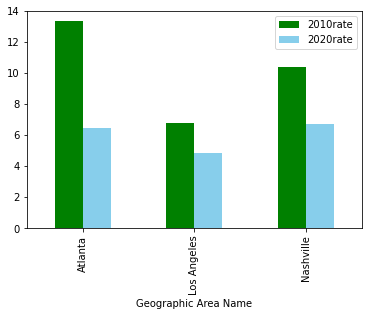

In [19]:
x=vancy["Geographic Area Name"], y=vancy["2010rate"]

fig,ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))

ax.barh(ind, y, width, color = "green")
  
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), 
            color = ('green', 'skyblue'), fontweight = 'bold')
plt.show()


ValueError: too many values to unpack (expected 2)